# mlreflect SPEC fitter usage example

In [1]:
import mlreflect
print('Tested with mlreflect version: ' + mlreflect.__version__)

In [2]:
from mlreflect.curve_fitter import CurveFitter, DefaultSpecFitter, example_spec_file_path

In [3]:
from ipywidgets import widgets, interact

In [4]:
spec_fitter = DefaultSpecFitter()

In [5]:
print(spec_fitter.trained_model.sample)

Air (ambient):
	sld: 0 [1e-6 1/Å^2]
[1] Film:
	thickness: (20, 1000) [Å]
	roughness: (0, 100) [Å]
	sld: (1, 14) [1e-6 1/Å^2]
[0] SiOx:
	thickness: 10.0 [Å]
	roughness: 2.5 [Å]
	sld: (17.7735+0.4048j) [1e-6 1/Å^2]
Si (substrate):
	roughness: 1 [Å]
	sld: (20.0701+0.4571j) [1e-6 1/Å^2]


In [6]:
spec_params = {
    'angle_columns': ["Theta", "Two Theta"],
    'intensity_column': "Speccorr"
}

spec_fitter.set_import_params(**spec_params)

In [7]:
footprint_params = {
    'wavelength': 1.5406,
    'beam_width': 0.165,
    'sample_length': 10
}

spec_fitter.set_footprint_params(**footprint_params)

In [8]:
spec_fitter.set_spec_file(example_spec_file_path)

62 scans found in /home/greco/Downloads/mlreflect_test/pre-test/lib/python3.6/site-packages/mlreflect/resources/example/example.spec


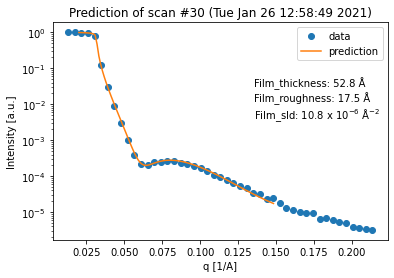

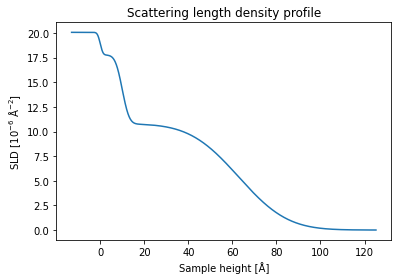

In [9]:
fit_result = spec_fitter.fit(30, trim_front=3, plot=True, polish=True)

In [10]:
fit_result.predicted_parameters

,SiOx_thickness,Film_thickness,Si_roughness,SiOx_roughness,Film_roughness,Si_sld,SiOx_sld,Film_sld,Air_sld
scan,,,,,,,,,
30,10.0,52.84444,1,2.5,17.461124,20.070100+0.457100j,17.773500+0.404800j,10.788871,0


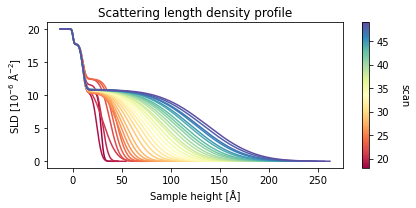

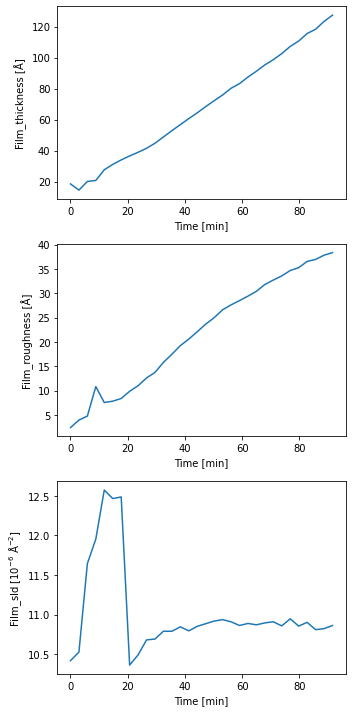

In [11]:
fit_result_series = spec_fitter.fit_range(range(18, 50), trim_front=3, plot=True, polish=True)

In [12]:
def plot_prediction(n):
    fit_result_series.fit_results_list[n].plot_prediction(['Film_thickness', 'Film_roughness', 'Film_sld'])

In [13]:
interact(plot_prediction,
         n=widgets.IntSlider(min=0, max=len(fit_result_series.fit_results_list) - 1, value=10),
         continuous_update=False);

interactive(children=(IntSlider(value=10, description='n', max=31), Output()), _dom_classes=('widget-interact'…